In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def plot(x,y,w,b,samples=100,param_range=100):
    X = np.linspace(-param_range, param_range, samples)
    Y = np.linspace(-param_range, param_range, samples)    
    xx, yy = np.meshgrid(X, Y)
    pp=np.zeros_like(xx)
    ss=np.zeros_like(xx)
    n,m=len(X),len(Y)
    for i in range(n):
        for j in range(m):
            plot_x=np.array([xx[i,j],yy[i,j]])
            pp[i,j]=apply_model(plot_x,w,b)
            ss[i,j]=linear(plot_x,w,b)

    f,(ax1,ax2)=plt.subplots(2,1,dpi=250)

    #plot logistic regression function

    surf1=ax1.contourf(xx,yy,pp,cmap='coolwarm')
    f.colorbar(surf1, shrink=0.8, aspect=5,ax=ax1)
    ax1.scatter(x[0],x[1],color="black",s=30)
    title="$\\sigma(wx+b)$"
    ax1.set_title(title)

    #plot linear function
    surf2=ax2.contourf(xx,yy,ss,cmap='coolwarm')
    f.colorbar(surf2, shrink=0.8, aspect=5,ax=ax2)
    ax2.scatter(x[0],x[1],color="black",s=30)
    title="wx+b"
    ax2.set_title(title)
    plt.tight_layout()
    plt.show()
    
def logistic(x):
    return 1/(1+np.exp(-x))

def linear(x,w,b):
    return x.dot(w)+b

def apply_model(x,w,b):
    return logistic(linear(x,w,b))

# Separación por Hiperplanos en Regresión Logística
Un concepto clave en regresión logística es que la parte _lineal_ de su función de salida, `wx+b`, determina un plano que divide el  espacio en 2. Por ende, esta separación por _hiperplanos_ codifica a los ejemplos `x` en base al signo de `wx+b`; si el signo es positivo, están de un lado del hiperplano. Si es negativo, están del otro lado. Además, la magnitud (que tan lejos del 0) del valor resultante me indica la `distancia` al hiperplano. 

Luego entonces, la función sigmoidea o logística, convierte estos valores positivos o negativos en probabilidades, que serán menores a 0.5 para los negativos, y mayores a 0.5 para los positivos.

La celda de más abajo permite explorar este concepto, para un modelo 2D. Probá cambiando los valores de `w`, `b`, y `x`, para observar como afectan al gráfico y la salida `y` resultante.

Para el valor x=[-1  3], el puntaje de la parte lineal es 0.06 y su probabilidad es 0.51

<Figure size 1500x1000 with 4 Axes>

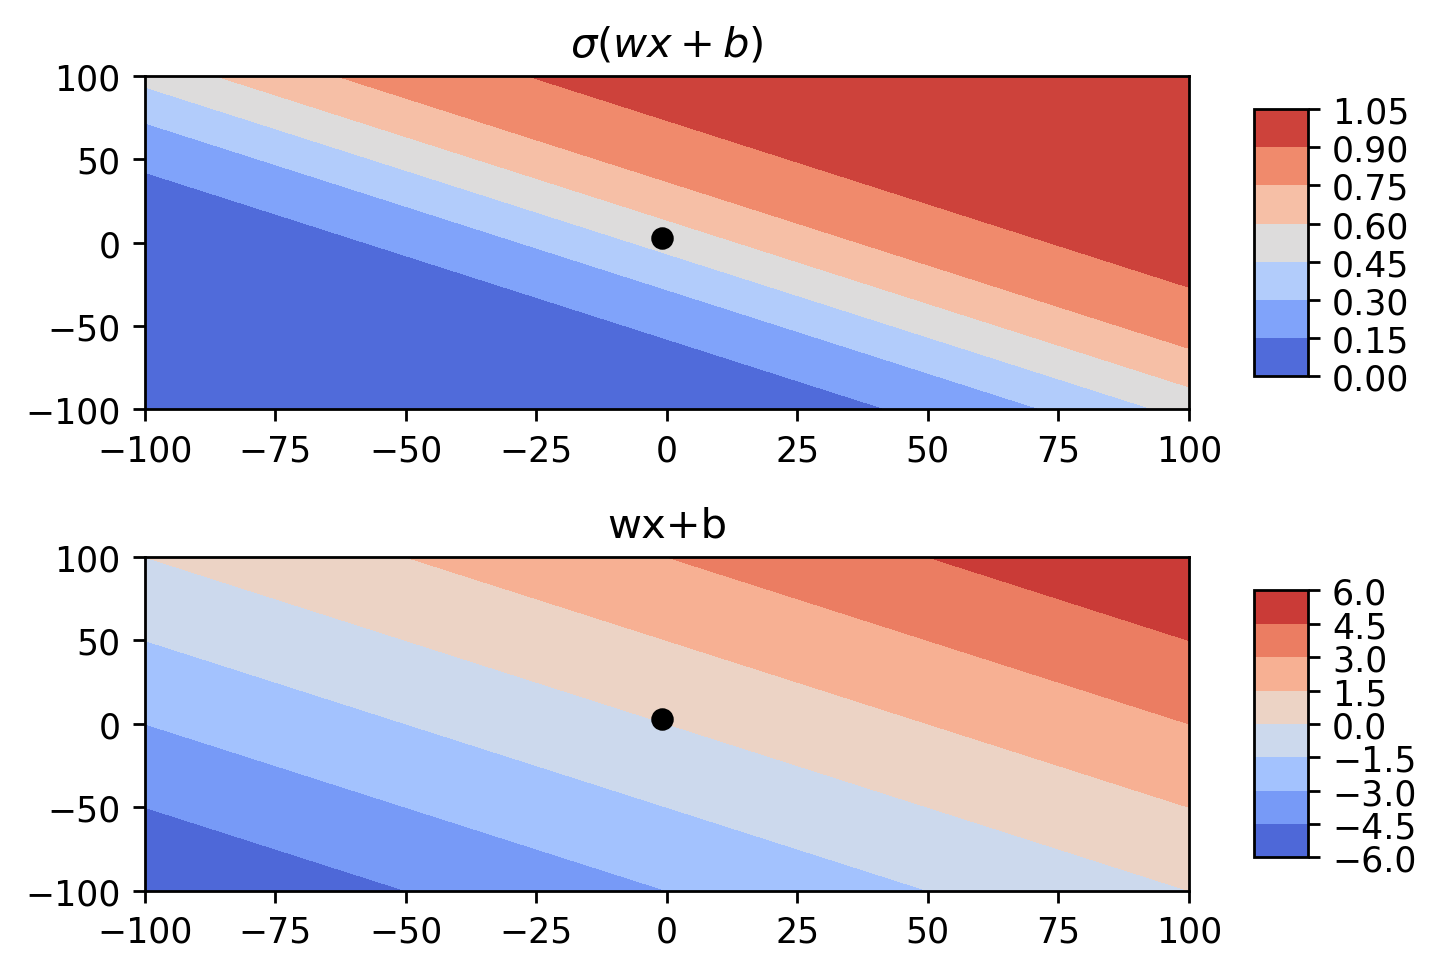

In [5]:
### VALORES A CAMBIAR
#model
w=np.array([ 0.03,0.03])
b=0

#data point 
x=np.array([-1,3])
### FIN VALORES A CAMBIAR

# calculo salida del modelo
y=linear(x,w,b)
print(f"Para el valor x={x}, el puntaje de la parte lineal es {y:.2f} y su probabilidad es {logistic(y):.2f}")

# dibujo
plot(x,y,w,b)